# Calculating Isobaric Binary Phase Diagrams

These are a few examples of how to use Thermo-Calc TDB files to calculate isobaric binary phase diagrams.

Note that, at the time of writing, invariant reactions (three-phase 'regions' on binary diagrams) are not yet automatically detected so they
are not drawn on the diagram.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v

## Al-Zn (S. Mey, 1993)

The miscibility gap in the fcc phase is included in the Al-Zn diagram, shown below.

The format for specifying a range of a state variable is (*start*, *stop*, *step*).

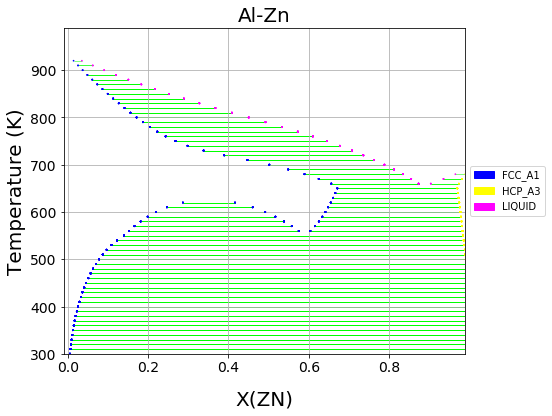

In [6]:
db_alzn = Database('alzn_mey.tdb')
my_phases_alzn = ['LIQUID', 'FCC_A1', 'HCP_A3']
fig = plt.figure(figsize=(9,6))
binplot(db_alzn, ['AL', 'ZN', 'VA'] , my_phases_alzn, {v.X('ZN'):(0,1,0.02),
                                                       v.T: (300, 1000, 10), v.P:101325},  ax=fig.gca())
plt.show()

## Al-Fe (M.Seiersten et al., 1991)

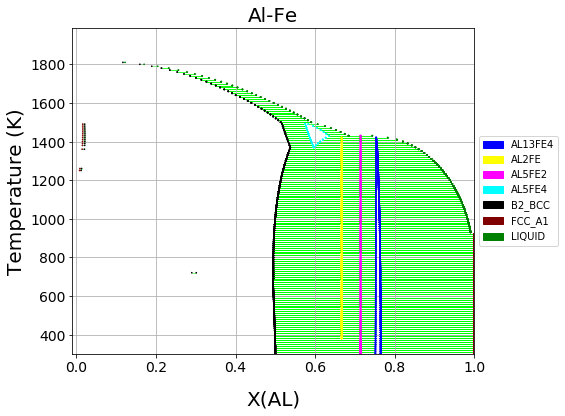

In [7]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'B2_BCC', 'FCC_A1', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL13FE4', 'AL5FE4']
fig = plt.figure(figsize=(9,6))
binplot(db_alfe, ['AL', 'FE', 'VA'] , my_phases_alfe, {v.X('AL'):(0,1,0.01),
                                                       v.T: (300, 2000, 10), v.P:101325}, ax=fig.gca())
plt.show()

## Al-Ni (N. Dupin et al., 2001)

Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1610.0)), ('X_AL', array(0.50001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1570.0)), ('X_AL', array(0.50001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1320.0)), ('X_AL', array(0.50001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1260.0)), ('X_AL', array(0.16001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1270.0)), ('X_AL', array(0.16001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1920.0)), ('X_AL', array(0.52001))])


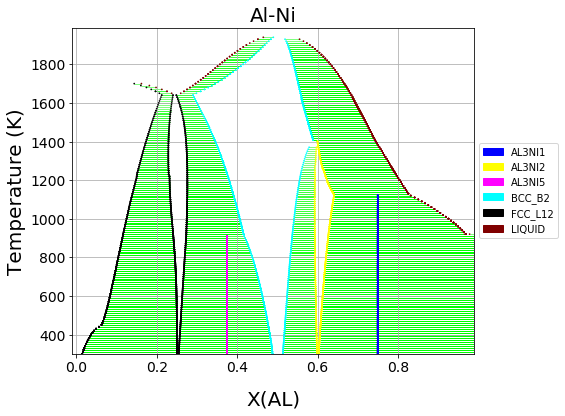

In [8]:
db_alni = Database('NI_AL_DUPIN_2001.TDB')
my_phases_alni = ['LIQUID', 'FCC_L12', 'BCC_B2', 'AL3NI5', 'AL3NI2', 'AL3NI1']
fig = plt.figure(figsize=(9,6))
binplot(db_alni, ['AL', 'NI', 'VA'] , my_phases_alni, {v.X('AL'):(1e-5,1,0.02),
                                                       v.T: (300, 2000, 10), v.P:101325}, ax=plt.gca())
plt.show()

## Nb-Re (X. L. Liu et al., 2013)

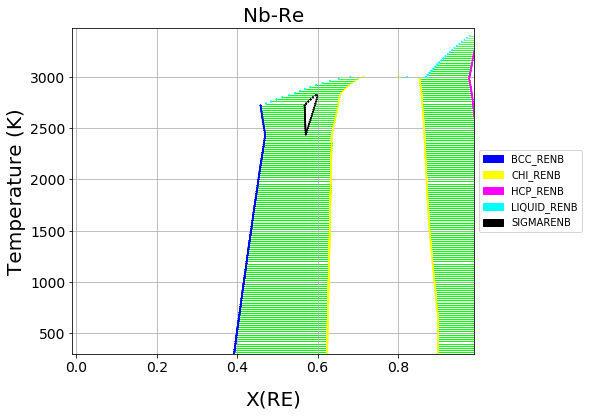

In [9]:
db_nbre = Database('nbre_liu.tdb')
my_phases_nbre = ['CHI_RENB', 'SIGMARENB', 'FCC_RENB', 'LIQUID_RENB', 'BCC_RENB', 'HCP_RENB']
fig = plt.figure(figsize=(9,6))
ax = binplot(db_nbre, ['NB', 'RE'] , my_phases_nbre, {v.X('RE'): (0,1,0.02), v.T: (300, 3500, 20), v.P:101325},
             ax=fig.gca())
plt.show()

# Calculating Energy Surfaces of Binary Systems

It is very common in CALPHAD modeling to directly examine the Gibbs energy surface of all the constituent phases in a system.

Below we show how the Gibbs energy of all phases may be calculated as a function of composition at a given temperature (2800 K).

Note that the chi phase has additional, internal degrees of freedom which allow it to take on multiple states for a given
overall composition. Only the low-energy states are relevant to calculating the equilibrium phase diagram.

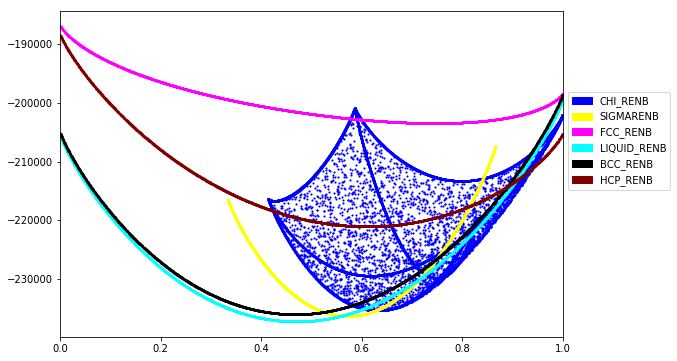

In [10]:
from pycalphad import calculate
from pycalphad.plot.utils import phase_legend
import numpy as np

legend_handles, colorlist = phase_legend(my_phases_nbre)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases_nbre:
    result = calculate(db_nbre, ['NB', 'RE'], name, P=101325, T=2800, output='GM')
    ax.scatter(result.X.sel(component='RE'), result.GM,
               marker='.', s=5, color=colorlist[name.upper()])
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()